In [9]:
import os
import numpy as np
import matplotlib

In [10]:
rootp = '../shared_exp/'
i0p = os.path.join(rootp,'interval0')
i1p = os.path.join(rootp,'interval1')
i2p = os.path.join(rootp,'interval2')
d005p = os.path.join(rootp,'dpm','eval_stage_effect_t005')
allp = os.path.join(rootp,'intervalAll')
i0 = []
i1 = []
c0 = []
c1 = []
i2 = []
d005 = []
all = []
c2 = []
c2p = os.path.join(rootp,'interval_control_2')
c0p = os.path.join(rootp,'interval_control_0')
c1p = os.path.join(rootp,'interval_control_1')
for i in range(1,41,5):
    a = np.load(os.path.join(i0p,"report_{}.npz".format(i)))
    b = np.load(os.path.join(i1p,"report_{}.npz".format(i)))
    c = np.load(os.path.join(c0p,"report_{}.npz".format(i)))
    d = np.load(os.path.join(c1p,"report_{}.npz".format(i)))
    d005.append(np.load(os.path.join(d005p,"report_{}.npz".format(i)))['fid'])
    i0.append(a['fid'])
    i1.append(b['fid'])
    c0.append(c['fid'])
    c1.append(d['fid'])
    c2.append(np.load(os.path.join(c2p,"report_{}.npz".format(i)))['fid'])
    i2.append(np.load(os.path.join(i2p,"report_{}.npz".format(i)))['fid'])
i0 = np.array(i0)
i1 = np.array(i1)
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
i2 = np.array(i2)
d005 = np.array(d005)
print(i0)
print(i1)
print(c0)
print(c1)
print(c2)
print(d005)
print(i2)

[12.266156   5.333433   4.796983   4.6837535  4.6750164  4.797349
  4.8565917  5.012515 ]
[11.946548   6.653371   6.0554757  5.979486   5.8340063  5.9290185
  6.000139   6.102211 ]
[20.570427   7.899639   6.662842   6.2536654  5.839603   5.6333804
  5.4695153  5.5040607]
[13.108102   6.497095   5.7671566  5.44534    5.415515   5.452102
  5.4178042  5.425336 ]
[12.620677   6.567206   6.0792527  5.656647   5.615528   5.4186273
  5.521365   5.488454 ]
[7.709337  5.8533235 5.7858124 5.469462  5.524149  5.3388267 5.4151106
 5.372903 ]
[5.7812867 5.70707   6.240726  6.462518  6.815167  7.1633635 7.5156684
 7.843044 ]


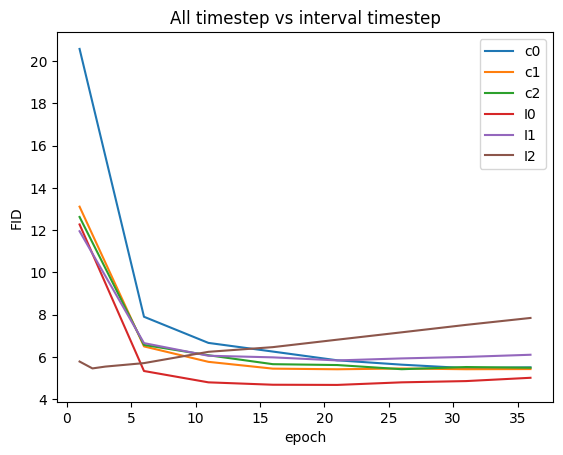

In [11]:

import matplotlib.pyplot as plt
i2 = []
y2 = list(range(1,4))+list(range(6,41,5))
for i in y2:
    i2.append(np.load(os.path.join(i2p,"report_{}.npz".format(i)))['fid'])
i2 = np.array(i2)

y = list(range(1,41,5))
plt.plot(y,c0,label='c0')
plt.plot(y,c1,label='c1')
plt.plot(y,c2,label='c2')
plt.plot(y,i0,label='I0')
#plt.plot(y,d005,label='t005')
plt.plot(y,i1,label='I1')
plt.plot(y2,i2,label='I2')

plt.legend()
#plt.xlabel("10k training iterations")
plt.xlabel("epoch")
plt.ylabel("FID")
plt.title("All timestep vs interval timestep")
plt.show()


In [12]:
dpm_ori_path = "../experiments/dpm/eval/"
dpm_fewer_path = "../experiments/dpm_fewer/eval/"
dpm_ori = []
dpm_fewer = []
allcp = os.path.join(rootp,'intervalA')
allc = []
for i in range(5,41,5):
    a = np.load(dpm_ori_path+"report_{}.npz".format(i))
    dpm_ori.append(a['fid'])
    b = np.load(dpm_fewer_path+"report_{}.npz".format(i))
    dpm_fewer.append(b['fid'])
    all.append(np.load(os.path.join(allp,"report_{}.npz".format(i)))['fid'])
    allc.append(np.load(os.path.join(allcp,"report_{}.npz".format(i)))['fid'])
dpm_ori = np.array(dpm_ori)
dpm_fewer = np.array(dpm_fewer)
all = np.array(all)
allc = np.array(allc)
print(dpm_ori)
print(dpm_fewer)

[12.060902   7.906168   6.5395794  6.041954   5.691998   5.420396
  5.3846006  5.359099 ]
[14.441078   9.79698    7.877878   7.1342683  6.6386886  6.541377
  6.3623405  6.366857 ]


[7.1354666 5.4506755 5.1041355 5.2615724 5.423892  5.897527  6.1815915
 6.639408 ]
[12.060902   7.906168   6.5395794  6.041954   5.691998   5.420396
  5.3846006  5.359099 ]


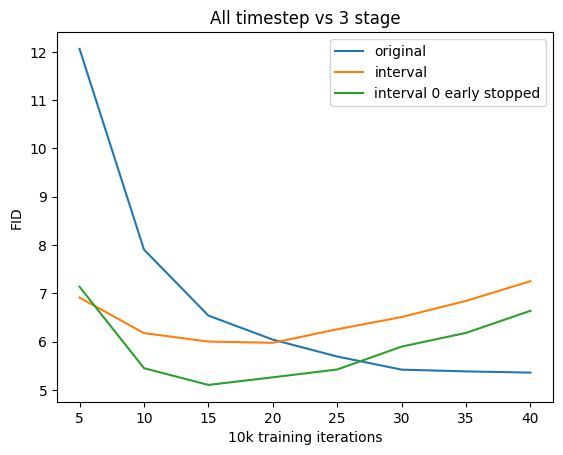

In [15]:
import matplotlib.pyplot as plt
y = list(range(5,41,5))
plt.plot(y,dpm_ori,label='original')
plt.plot(y,all,label='interval')
plt.plot(y,allc,label='interval 0 early stopped')
print(allc)
print(dpm_ori)
plt.legend()
plt.xlabel("10k training iterations")
plt.ylabel("FID")
plt.title("All timestep vs 3 stage")
plt.show()